In [1]:
#1. Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2. Read the data file and show the data
df = pd.read_csv('/Users/mac/Documents/HK6/IS403.PTDL KD/đồ án main/code/Data_stock_HVN_new.csv')
df

,time,open,high,low,close,volume
0,2019-03-01,30274,31432,30274,31278,1231293
1,2019-03-04,31046,33209,31046,33131,2159830
2,2019-03-05,33209,36298,32668,32900,1352465
3,2019-03-06,32050,33054,32050,32745,815962
4,2019-03-07,32591,33054,32359,32436,713115
...,...,...,...,...,...,...
1302,2024-05-27,24200,25350,24000,25150,6719200
1303,2024-05-28,25300,26900,24500,26900,9317700
1304,2024-05-29,26900,28450,26900,28300,6449500
1305,2024-05-30,28300,28500,26800,27700,6116600


In [3]:
# 3. Divide the train:test at a ratio of 8:2
df = df[['close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing
train_size = int(0.8 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [4]:
# 4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)  

In [6]:
# 6. The process of creating index predict the next 30, 60, 90 days
last_index = df.index[-1]

# Create arrays of consecutive integers starting from last_index for 30, 60, and 90 days
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

# Predict the closing prices for the next 30, 60, and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 30, 60, 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)


Predicted closing prices for the next 30 days:
[9939.04548478 9923.96512947 9908.88477416 9893.80441885 9878.72406354
 9863.64370824 9848.56335293 9833.48299762 9818.40264231 9803.322287
 9788.24193169 9773.16157638 9758.08122108 9743.00086577 9727.92051046
 9712.84015515 9697.75979984 9682.67944453 9667.59908923 9652.51873392
 9637.43837861 9622.3580233  9607.27766799 9592.19731268 9577.11695737
 9562.03660207 9546.95624676 9531.87589145 9516.79553614 9501.71518083]
Predicted closing prices for the next 60 days:
[9939.04548478 9923.96512947 9908.88477416 9893.80441885 9878.72406354
 9863.64370824 9848.56335293 9833.48299762 9818.40264231 9803.322287
 9788.24193169 9773.16157638 9758.08122108 9743.00086577 9727.92051046
 9712.84015515 9697.75979984 9682.67944453 9667.59908923 9652.51873392
 9637.43837861 9622.3580233  9607.27766799 9592.19731268 9577.11695737
 9562.03660207 9546.95624676 9531.87589145 9516.79553614 9501.71518083
 9486.63482552 9471.55447022 9456.47411491 9441.3937596  

In [7]:
# 7. Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import numpy as np

# Calculate RMSE 
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_test = mean_absolute_percentage_error(y_test, y_pred)

# Calculate MLSE 
msle_test = mean_squared_log_error(y_test, y_pred)


print("RMSE:", rmse_test)
print("MAPE:", mape_test, "%")
print("MSLE:", msle_test)

RMSE: 4163.784933091335
MAPE: 13.56304670301976 %
MSLE: 0.07678499212961137


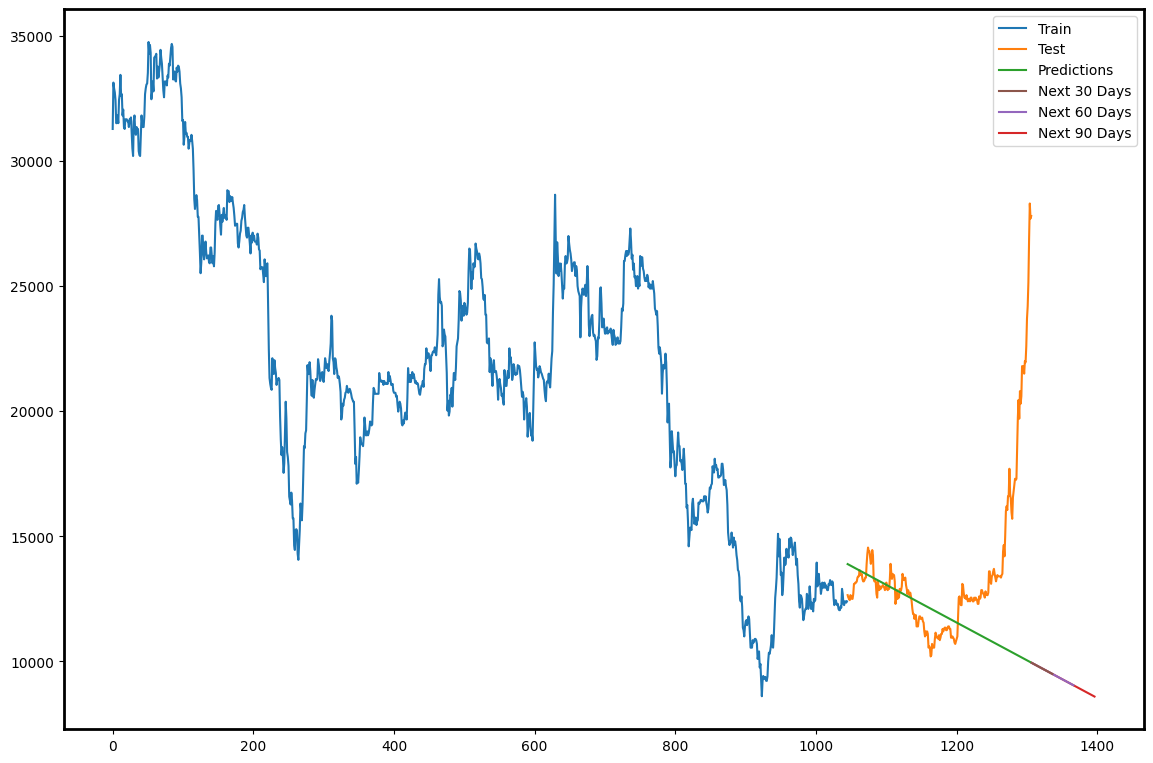

In [8]:
# 8.Plot the results
plt.figure(figsize=(12, 8))
line1, = plt.plot(train_data.index, train_data['close'], label='Train')
line2, = plt.plot(test_data.index, test_data['close'], label='Test')
line3, = plt.plot(test_data.index, y_pred, label='Predictions')
line4, = plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days')
line5, = plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next 60 Days')
line6, = plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next 30 Days')
plt.legend(handles=[line1, line2, line3, line6, line5, line4])

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
    
plt.show()